In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Professional Languages pre-processing

In [8]:
#attach google drive folder to read datasets
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Project/GithubDataset/profesionalLanguages.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,events_repo_language,events_count_pull_request,created_at
0,JavaScript,432344,2019
1,Python,289138,2019
2,Java,192703,2019
3,TypeScript,180745,2019
4,Go,159997,2019


In [3]:
#create a copy of the original df and rename the columns
df1 = df
df1.columns = ['Language','Count','Year']
df1.head()

,Language,Count,Year
0,JavaScript,432344,2019
1,Python,289138,2019
2,Java,192703,2019
3,TypeScript,180745,2019
4,Go,159997,2019


In [4]:
print(df1['Language'].nunique()) # number of different languages in the dataset

312


In [5]:
#save each language df into a dictionary key
professional_languages_dict = {}

unique_languages = list(df1['Language'].unique())
for i in unique_languages:
  temporal_df = df1.loc[df1['Language']==i]
  professional_languages_dict[i] = temporal_df
  temporal_df = None

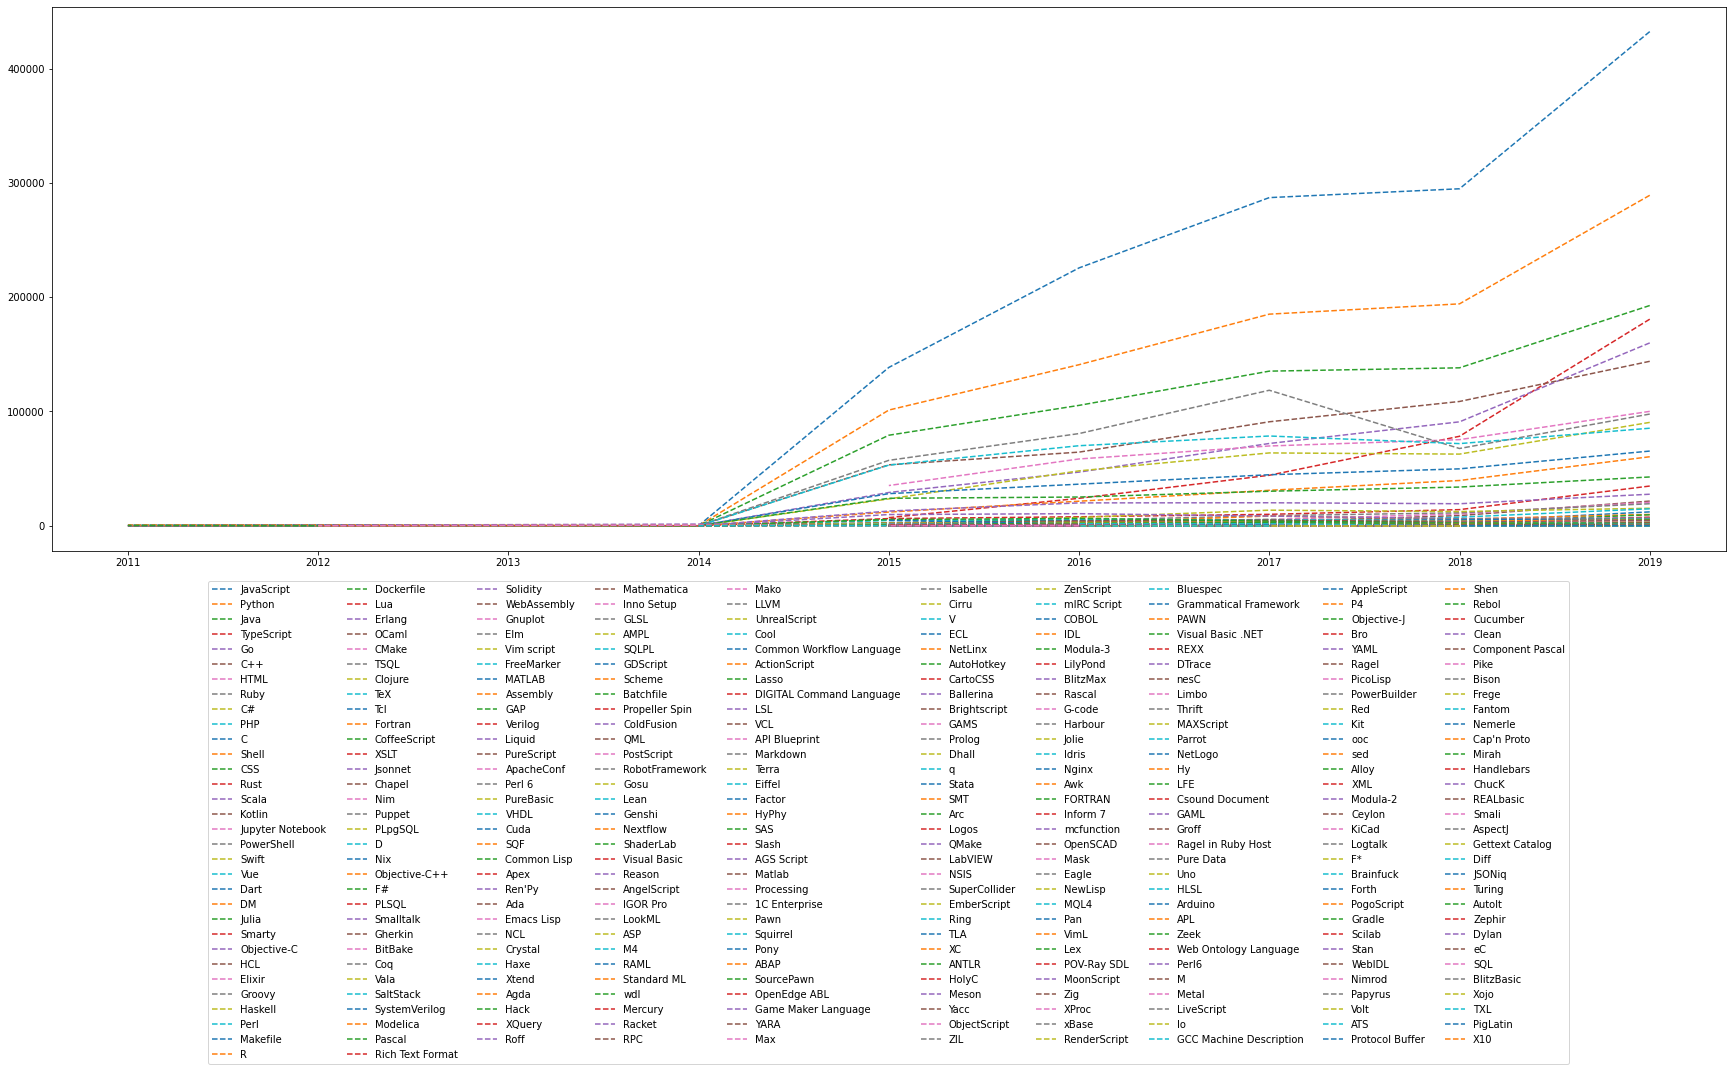

In [7]:
#plot each professional language trend
for key,value in professional_languages_dict.items():
  plt.plot(value['Year'], value['Count'], '--', label=str(key))


plt.legend(loc='center',ncol=10,bbox_to_anchor=(0.5, -0.5))
mpl.rcParams['figure.figsize'] = (30, 10)
mpl.rcParams['axes.grid'] = False
plt.show()


# All the languages pre-processing

In [ ]:
#specify the years to read for the general purporses languages
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019]

#create empty df
general_df = pd.DataFrame(columns=['events_repo_language','events_count_pull_request','created_at'])

#read each year csv and append it to the general df
for i in years:
  temp_df = pd.read_csv("/content/drive/My Drive/Project/GithubDataset/{}.csv".format(i))
  general_df = general_df.append(temp_df,ignore_index=True)
  temp_df = None

In [ ]:
general_df.columns = ['Language','Count','Year']
general_df['Count'] = pd.to_numeric(general_df['Count'])
print(general_df.head())
print(general_df.tail())

     Language  Count     Year
0        Ruby   4223  2011-10
1  JavaScript   3865  2011-10
2        Java   3374  2011-10
3      Python   3173  2011-10
4         PHP   3019  2011-10
      Language  Count     Year
18570    CLIPS      1  2019-12
18571     Riot      1  2019-12
18572     GAML      1  2019-12
18573      APL      1  2019-12
18574    Frege      1  2019-12


In [ ]:
#store each language df into a dictionary key
general_languagues_dict = {}

general_languages_list = list(general_df['Language'].unique())
for i in general_languages_list:
  temp_df = general_df.loc[general_df['Language'] == i]
  general_languagues_dict[i] = temp_df
  temp_df = None


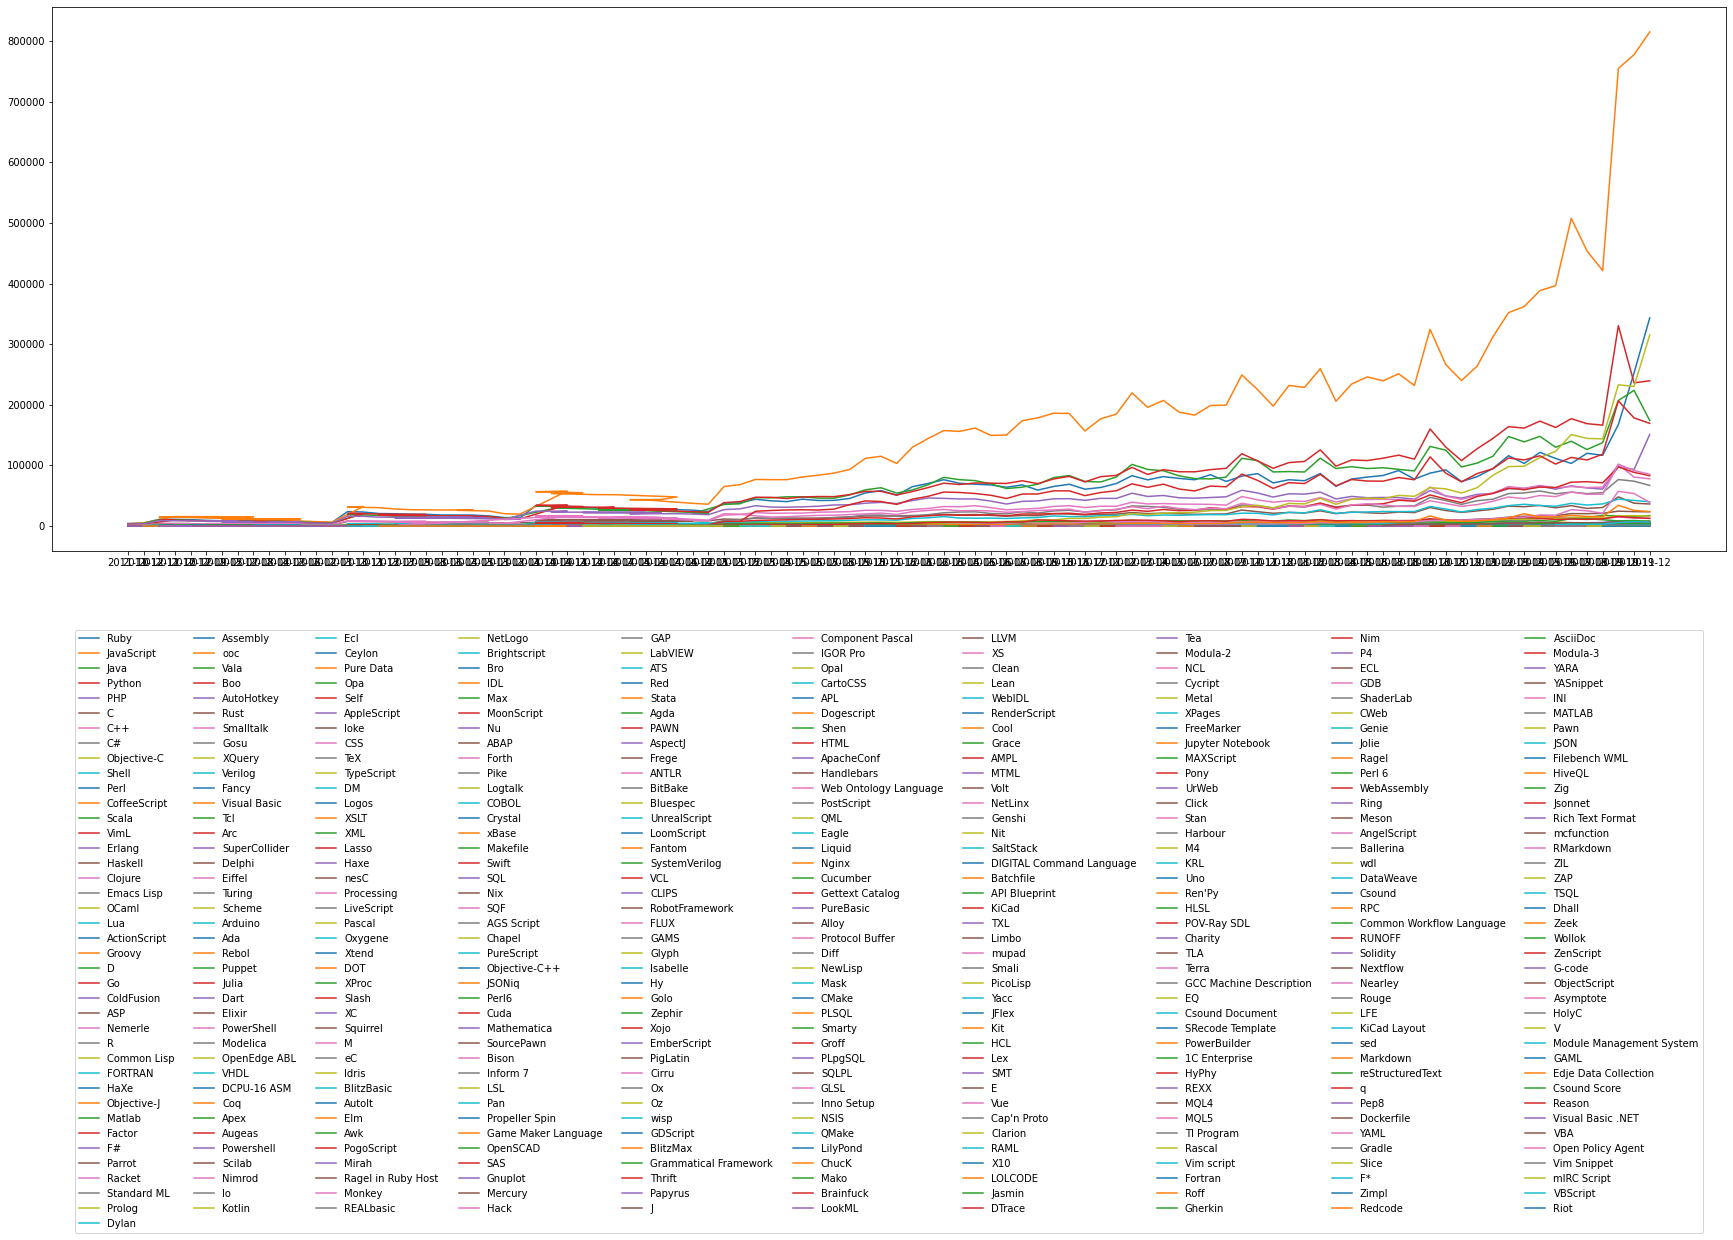

In [ ]:
for key,value in general_languagues_dict.items():
  plt.plot(value['Year'],value['Count'],'-',label=str(key))
    

plt.legend(loc='center',ncol=10,bbox_to_anchor=(0.5, -0.7))
mpl.rcParams['figure.figsize'] = (30, 10)
mpl.rcParams['axes.grid'] = False
plt.show()

In [ ]:
test_df = general_languagues_dict['Python']
print(test_df.head())
test_df.shape

    Language  Count     Year
3     Python   3173  2011-10
59    Python   3539  2011-12
127   Python  10084  2012-10
128   Python   9994  2012-11
131   Python   9212  2012-12


(98, 3)

In [ ]:
test_df.columns

Index(['Language', 'Count', 'Year'], dtype='object')

In [ ]:
# test_df.groupby([test_df.Year.str[:4],'Year']).sum()
test_df = test_df.groupby([test_df.Year.str[:4]]).sum()
# # test_df = test_df.drop(['Year'],axis=1)
test_df.reset_index(inplace=True)
# test_df = test_df.drop(['Language'],axis=1)
test_df['Language'] = 'Python'
test_df


,Year,Count,Language
0,2011,6712,Python
1,2012,90944,Python
2,2013,207049,Python
3,2014,351273,Python
4,2015,582495,Python
5,2016,849432,Python
6,2017,1130234,Python
7,2018,1391125,Python
8,2019,2253247,Python


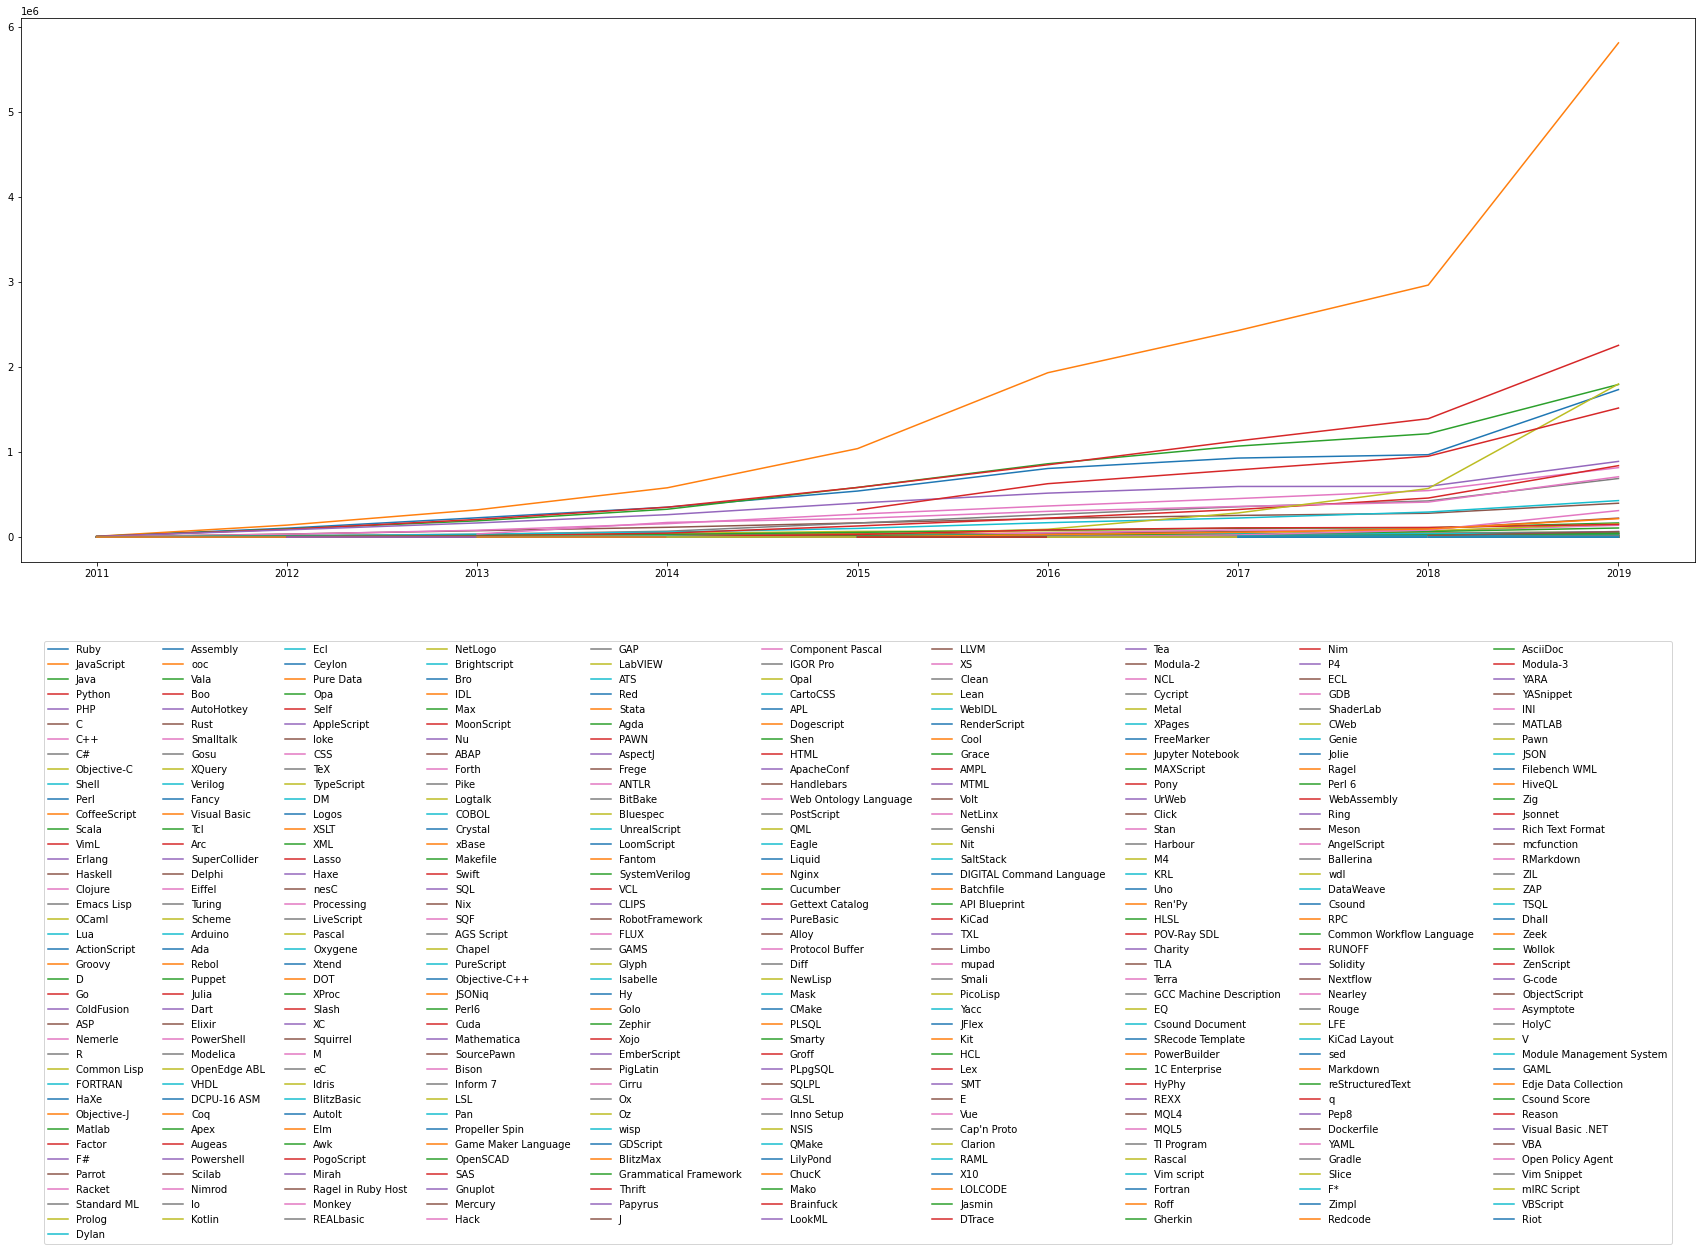

In [ ]:
for key,value in general_languagues_dict.items():
  test_df = general_languagues_dict[key]
  test_df = test_df.groupby([test_df.Year.str[:4]]).sum()
  # test_df = test_df.drop(['Year'],axis=1)
  test_df.reset_index(inplace=True)
  # test_df = test_df.drop(['Language'],axis=1)
  test_df['Language'] = str(key)
  plt.plot(test_df['Year'],test_df['Count'],'-',label=str(key))
  test_df = None

plt.legend(loc='center',ncol=10,bbox_to_anchor=(0.5, -0.7))
# mpl.rcParams['figure.figsize'] = (30, 10)
mpl.rcParams['axes.grid'] = False
plt.show()


# RNN 

In [ ]:
professional_languages_dict.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'TypeScript', 'Go', 'C++', 'HTML', 'Ruby', 'C#', 'PHP', 'C', 'Shell', 'CSS', 'Rust', 'Scala', 'Kotlin', 'Jupyter Notebook', 'PowerShell', 'Swift', 'Vue', 'Dart', 'DM', 'Julia', 'Smarty', 'Objective-C', 'HCL', 'Elixir', 'Groovy', 'Haskell', 'Perl', 'Makefile', 'R', 'Dockerfile', 'Lua', 'Erlang', 'OCaml', 'CMake', 'TSQL', 'Clojure', 'TeX', 'Tcl', 'Fortran', 'CoffeeScript', 'XSLT', 'Jsonnet', 'Chapel', 'Nim', 'Puppet', 'PLpgSQL', 'D', 'Nix', 'Objective-C++', 'F#', 'PLSQL', 'Smalltalk', 'Gherkin', 'BitBake', 'Coq', 'Vala', 'SaltStack', 'SystemVerilog', 'Modelica', 'Pascal', 'Rich Text Format', 'Solidity', 'WebAssembly', 'Gnuplot', 'Elm', 'Vim script', 'FreeMarker', 'MATLAB', 'Assembly', 'GAP', 'Verilog', 'Liquid', 'PureScript', 'ApacheConf', 'Perl 6', 'PureBasic', 'VHDL', 'Cuda', 'SQF', 'Common Lisp', 'Apex', "Ren'Py", 'Ada', 'Emacs Lisp', 'NCL', 'Crystal', 'Haxe', 'Xtend', 'Agda', 'Hack', 'XQuery', 'Roff', 'Mathematica', 'Inno Setup', 'GLSL', 'AM

In [ ]:
general_languagues_dict['Python'].head()

,Language,Count,Year
3,Python,3173,2011-10
59,Python,3539,2011-12
127,Python,10084,2012-10
128,Python,9994,2012-11
131,Python,9212,2012-12


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

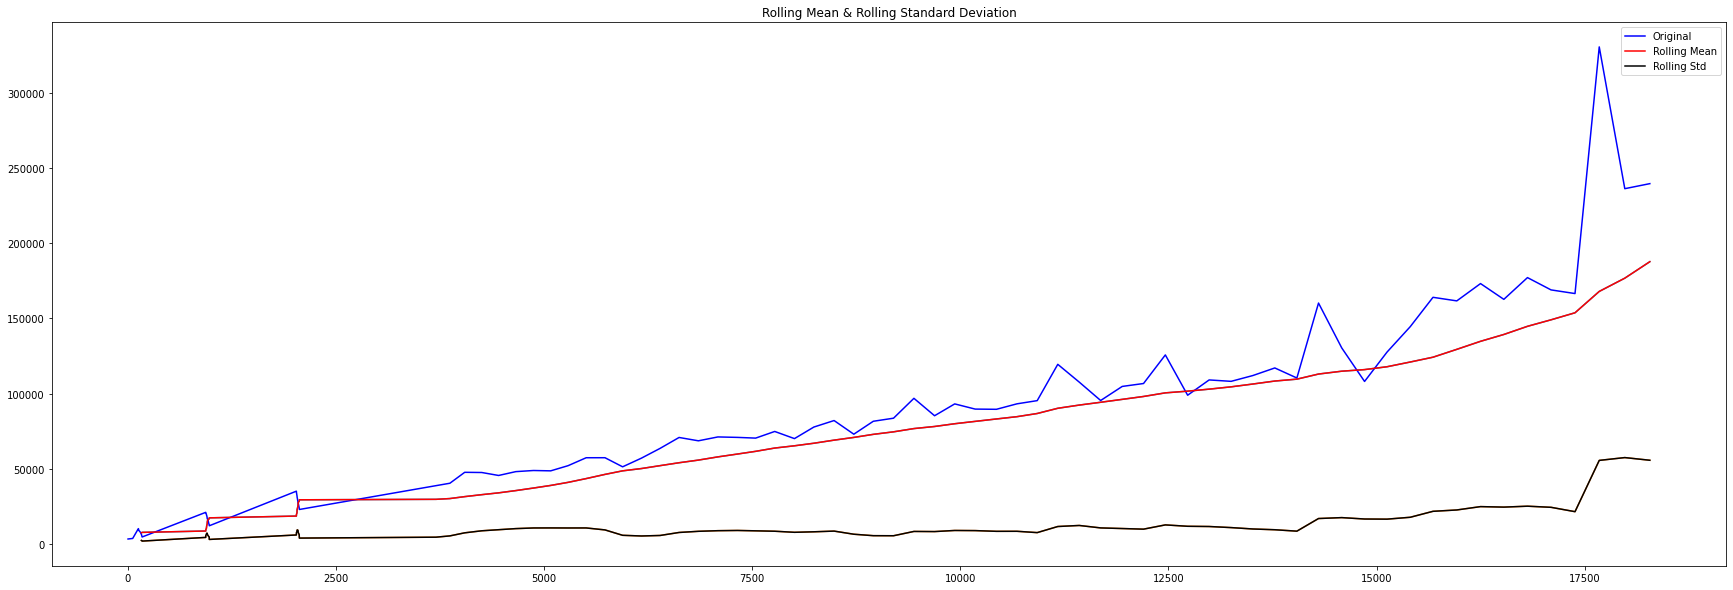

In [ ]:
rolling_mean = general_languagues_dict['Python']['Count'].rolling(window = 12).mean()
plt.plot(rolling_mean)
rolling_std = general_languagues_dict['Python']['Count'].rolling(window = 12).std()
plt.plot(rolling_std)
plt.plot( general_languagues_dict['Python']['Count'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # # Dickey–Fuller test:
    # result = adfuller(timeseries['Passengers'])
    # print('ADF Statistic: {}'.format(result[0]))
    # print('p-value: {}'.format(result[1]))
    # print('Critical Values:')
    # for key, value in result[4].items():
    #     print('\t{}: {}'.format(key, value))

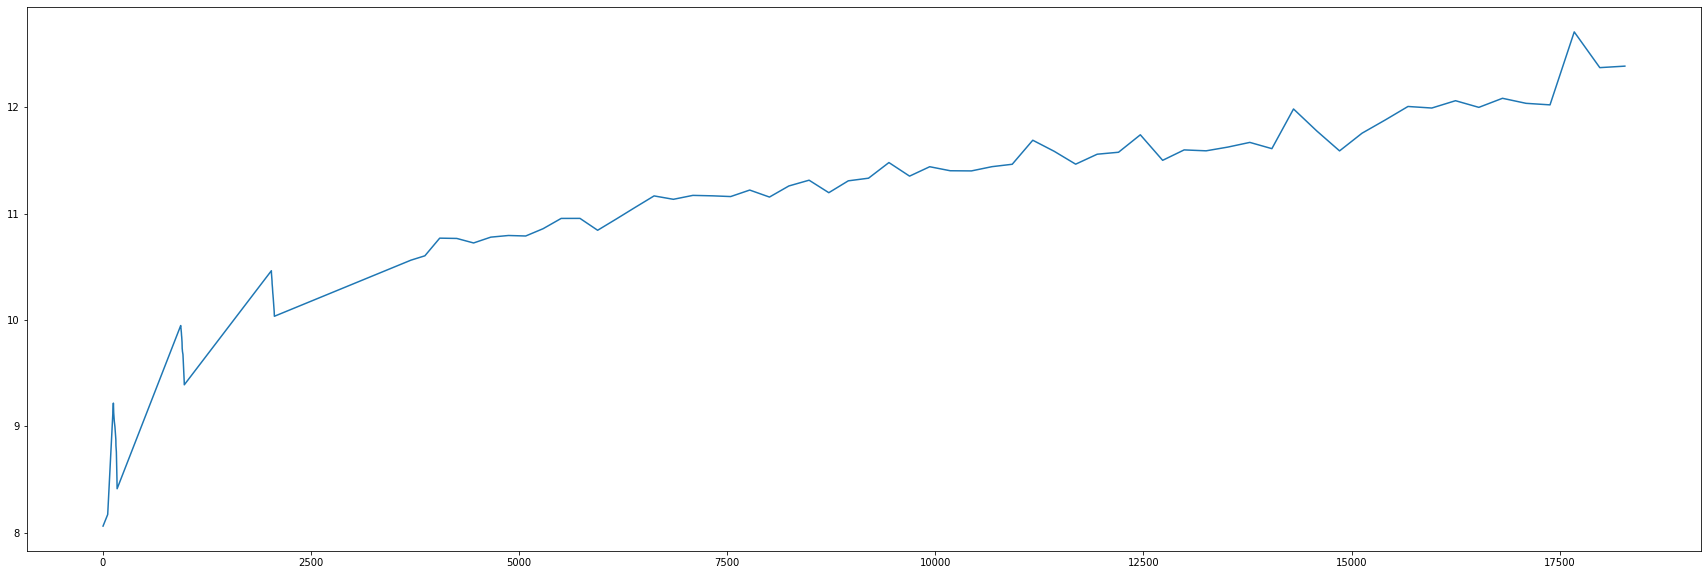

In [ ]:
df_log = np.log(general_languagues_dict['Python']['Count'])
plt.plot(df_log)

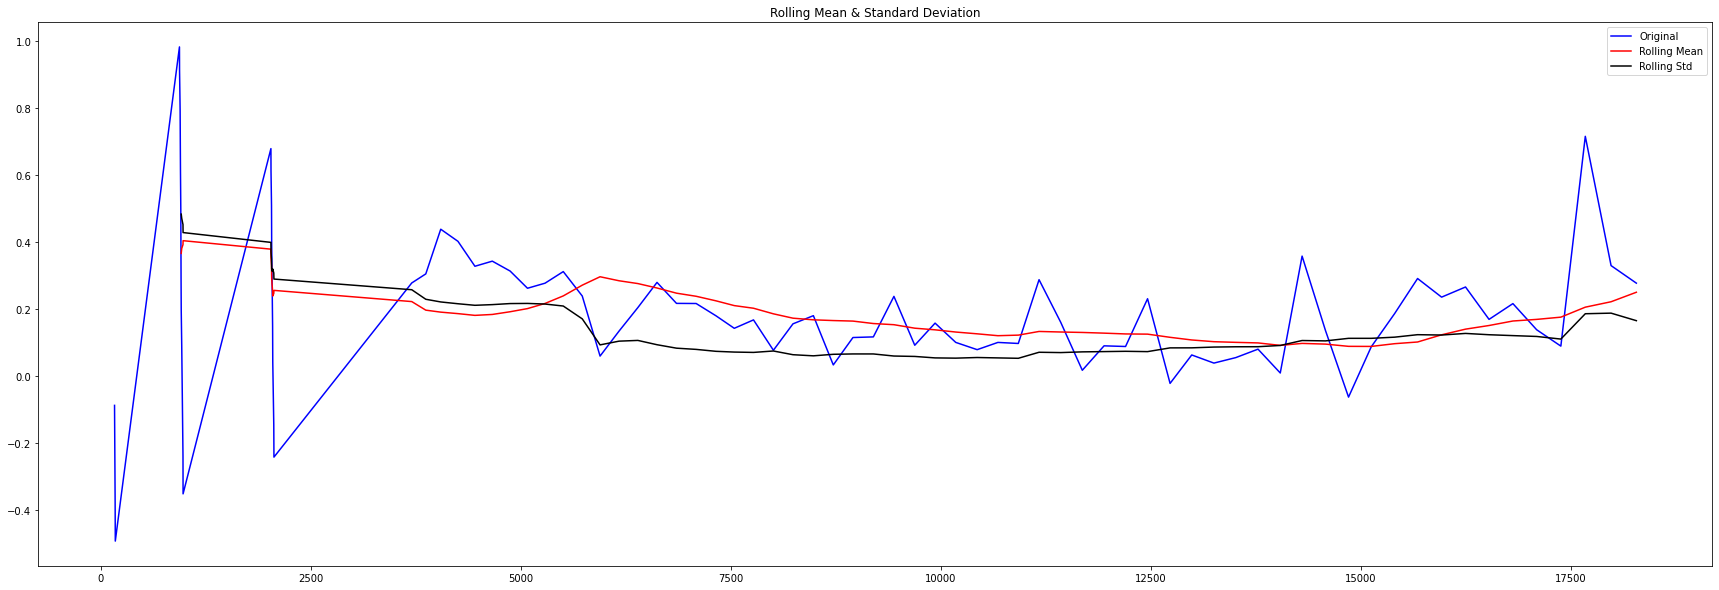

In [ ]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

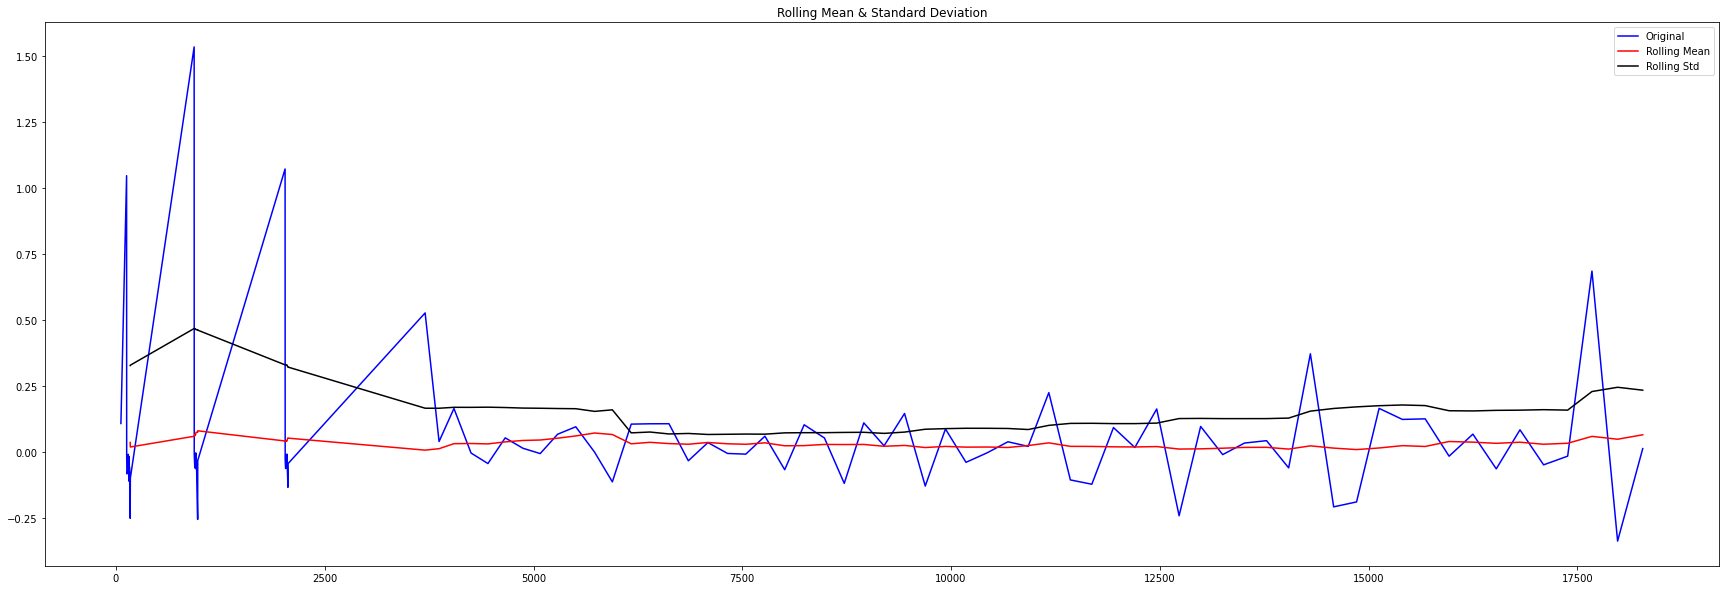

In [ ]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

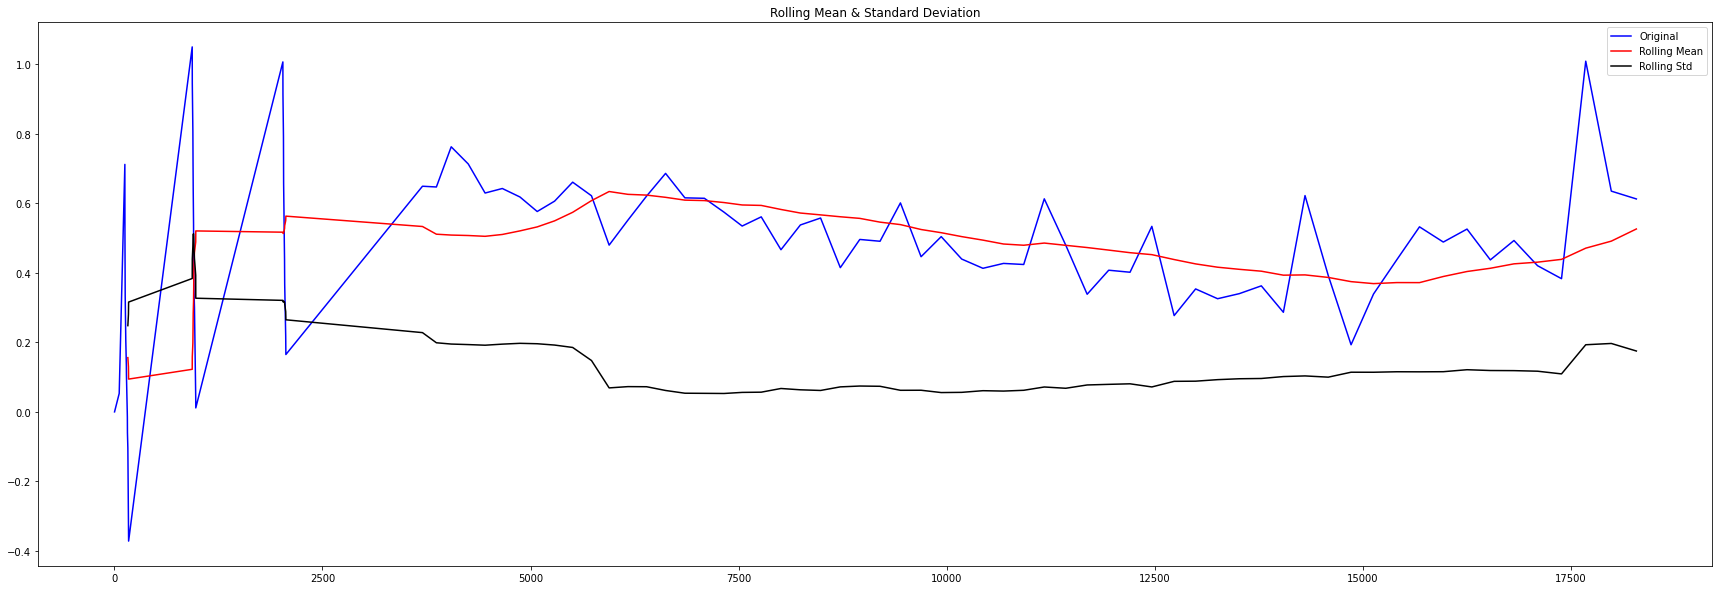

In [ ]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

In [ ]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

AttributeError: ignored

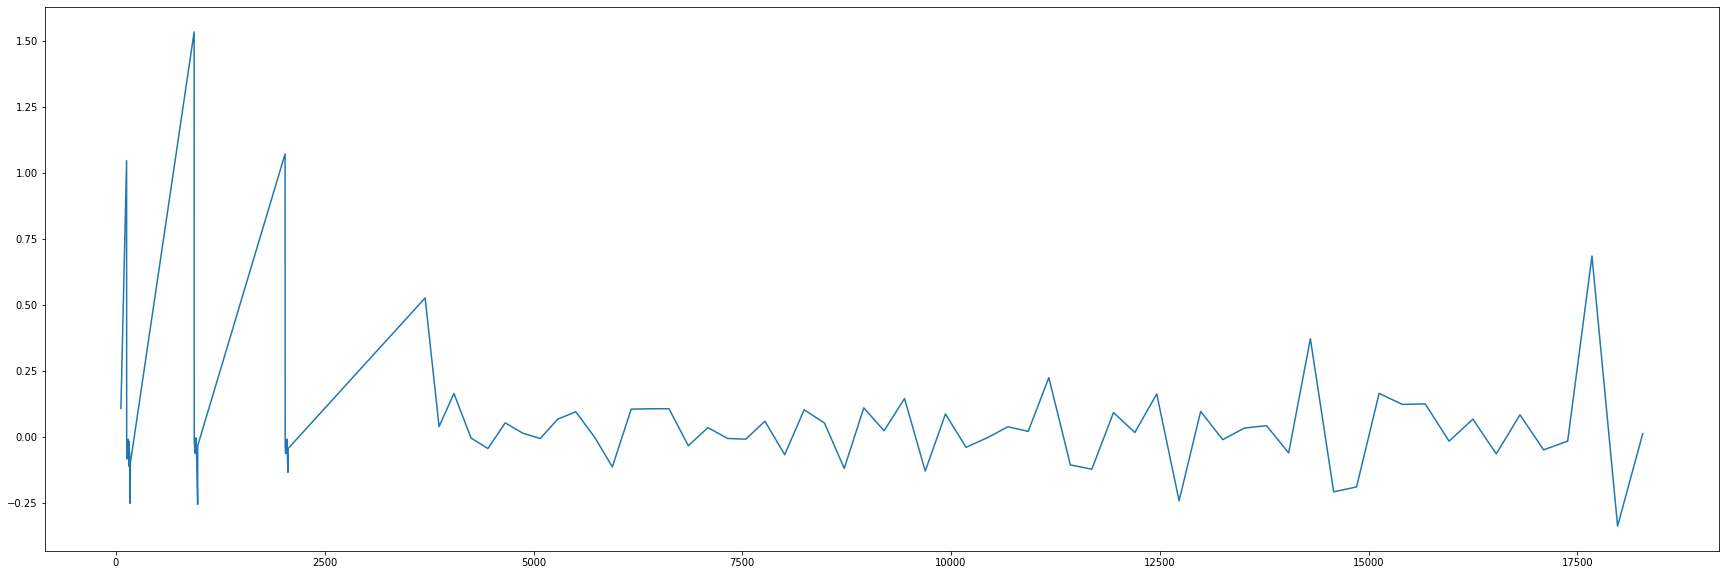

In [ ]:
plt.plot(df_log_shift)

# Univariate-model

In [ ]:
tf.random.set_seed(13)

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [ ]:
'''Plotting a sample data-point'''

def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(50, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

def multi_step_plot_tail(history, true_future, prediction):
  plt.figure(figsize=(18, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper x_val_multileft')
  plt.xlim([-10, 30])
  plt.show()

In [ ]:
def baseline(history):
  return np.mean(history)

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [ ]:
#HYPERPARAMETERS
EVALUATION_INTERVAL = 60
EPOCHS = 100
past_history = 12
future_target = 12
STEP = 1
BATCH_SIZE = 60
BUFFER_SIZE = 10000
ValidationSteps = 10
LEARNING_RATE_VALUE = 0.001

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    # if single_step:
    #   labels.append(target[i+target_size])
    # else:
    #   labels.append(target[i:i+target_size])

    labels_index = range(i,i+target_size,step)
    labels.append(dataset[labels_index])
    
  return np.array(data), np.array(labels)

In [ ]:
count = 1
unidata_dicts = {}
train_history_dicts = {}

for key in general_languagues_dict.keys():
  # print(general_languagues_dict[key].dtypes)
  if(count > 1):
    break
  
  count +=1 
  
  uni_data = general_languagues_dict[key]['Count']
  uni_data.index =  general_languagues_dict[key]['Year']
  print("Language: ",key)
  # print(uni_data)

  uni_data.plot(subplots=True)

  uni_data = uni_data.values

  TRAIN_SPLIT = int(len(uni_data)*0.7)

  print("Train split",TRAIN_SPLIT)

  uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
  uni_train_std = uni_data[:TRAIN_SPLIT].std()

  dataset = (uni_data-uni_train_mean)/uni_train_std

  print("len", len(dataset))

  x_train_multi, y_train_multi = multivariate_data(dataset, dataset, 0,
                                                  TRAIN_SPLIT, past_history,
                                                  future_target, STEP)
  x_val_multi, y_val_multi = multivariate_data(dataset, dataset, TRAIN_SPLIT,
                                              None, past_history,
                                              future_target, STEP)

  # print(x_train_multi.shape)
  # print(x_val_multi.shape)
  # print(x_train_multi,y_train_multi)
  x_train_multi = np.expand_dims(x_train_multi, axis=2) #The train parameters have to be a 3d vector, when we are using a univariate we have to reshape
  x_val_multi = np.expand_dims(x_val_multi, axis=2)

################################################################################

  '''Let's check out a sample data-point'''

  print ('Single window of past history : {}'.format(x_train_multi[0].shape))
  print ('\n Target to predict : {}'.format(y_train_multi[0].shape))

################################################################################

  train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
  train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

  val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
  val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

################################################################################

  for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))
    break;

################################################################################

  print(x_train_multi.shape[-2:])

################################################################################

  multi_step_model = tf.keras.models.Sequential()
  multi_step_model.add(tf.keras.layers.LSTM(32,
                                            return_sequences=True,
                                            input_shape=x_train_multi.shape[-2:]))
  multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
  multi_step_model.add(tf.keras.layers.Dense(future_target))


  sgd = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE_VALUE, decay=1e-6, momentum=0.9, nesterov=True)
      # single_step_model.compile(optimizer=sgd, loss='mae')
  # multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
  multi_step_model.compile(optimizer = sgd, loss='mae')

################################################################################

  '''Let's see how the model predicts before it trains'''

  for x, y in val_data_multi.take(1):
    print(multi_step_model.predict(x).shape)

################################################################################

  multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_multi,
                                            validation_steps=ValidationSteps)
  
  train_history_dicts[key] = multi_step_history
################################################################################

  plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

################################################################################


  '''Let's now have a look at how well your network has learnt to predict the future'''

  for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

################################################################################

